In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv("Wine.csv")

In [28]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
df.shape

(178, 14)

In [30]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [31]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

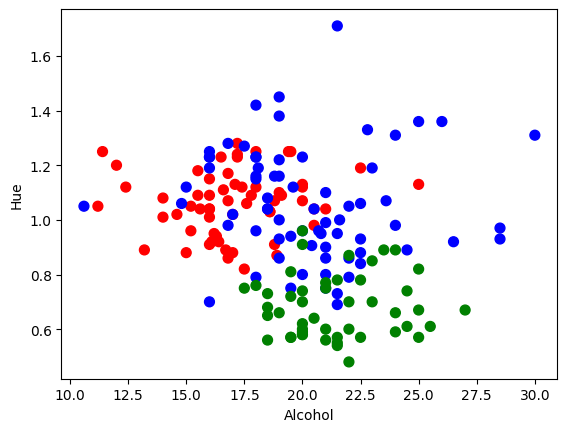

In [34]:
colors = {1:'red', 2:'blue', 3: 'green'}
plt.scatter(df.loc[:, 'Acl'], df.loc[:,'Hue'], c = [colors[i] for i in y], s = 50)
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.show()

In [35]:
#Before applying PCA, we need to standardize/normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [37]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

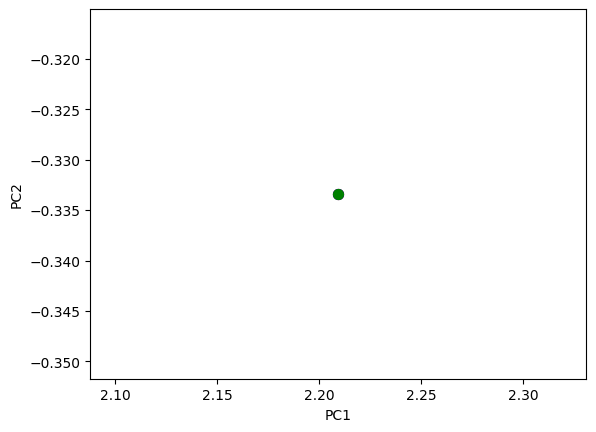

In [43]:
#targets = y.unique()
colors = ['red','blue','green']
for target, color in zip(y,colors):
    #indicesToKeep = df['Wine'] == target
    plt.scatter(X_pca[target, 0], X_pca[target, 1], c = color, s = 50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

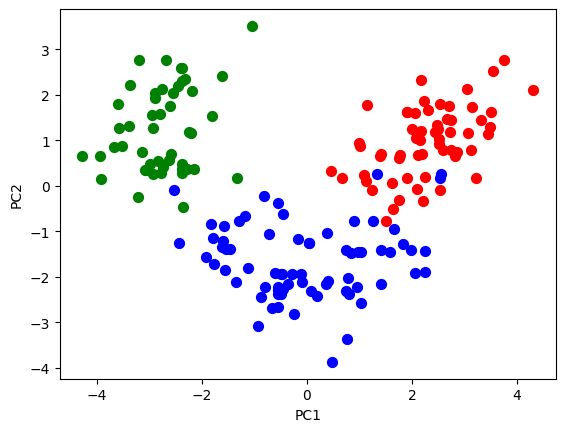

In [38]:
targets = y.unique()
colors = ['red','blue','green']
for target, color in zip(targets,colors):
    indicesToKeep = df['Wine'] == target
    plt.scatter(X_pca[indicesToKeep, 0], X_pca[indicesToKeep, 1], c = color, s = 50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [39]:
pca.explained_variance_

array([4.73243698, 2.51108093])

In [40]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

In [44]:
pca.components_.shape

(2, 13)

In [41]:
pca.singular_values_

array([28.94203422, 21.08225141])

In [42]:
pca.noise_variance_

0.5299934927686274